In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from xgboost.sklearn import XGBClassifier

In [7]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)


In [8]:
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test' ,skiprows = 1, header = None)



In [10]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
'marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain',
'capital_loss', 'hours_per_week', 'native_country', 'wage_class']


In [11]:
train_set.columns = col_labels
test_set.columns = col_labels


In [12]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [15]:
train_set.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [22]:
import seaborn as sns

<AxesSubplot:xlabel='age', ylabel='count'>

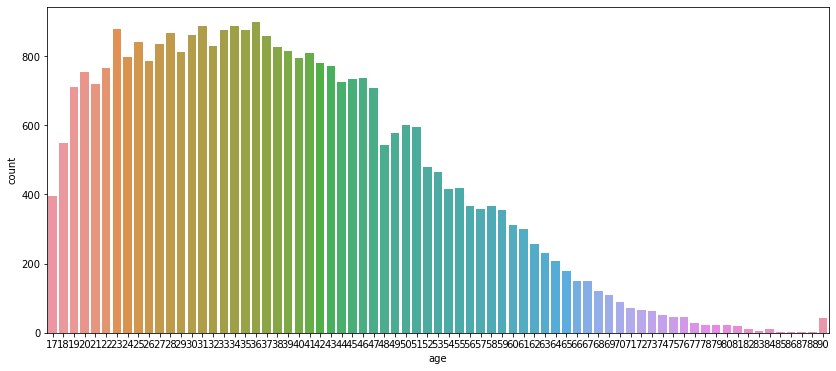

In [25]:
plt.figure(figsize=(14,6))
sns.countplot(x='age',data=train_set)


<AxesSubplot:xlabel='age', ylabel='capital_gain'>

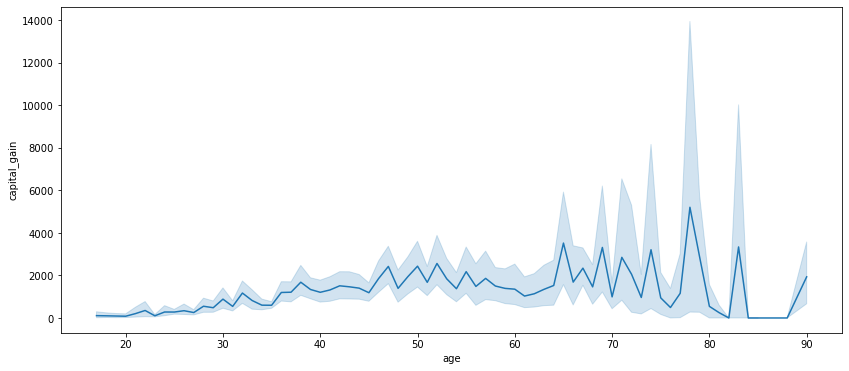

In [28]:
plt.figure(figsize=(14,6))
sns.lineplot(x='age',y='capital_gain' ,data=train_set)

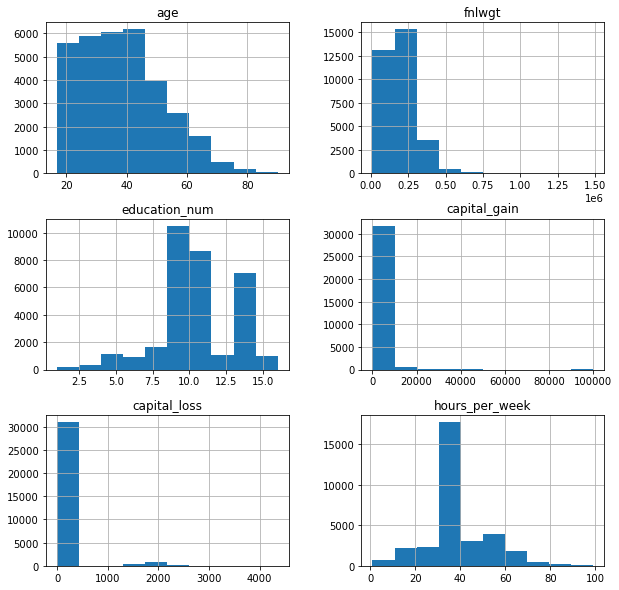

In [29]:
train_set.hist(figsize=(10,10))
plt.show()

In [30]:
for feature in cols:
    if train_set[feature].dtype == 'object':
        
        print('_'*10,feature, end=" ",)
        print('_'*10)
        print(train_set[feature].value_counts())
        

__________ workclass __________
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
__________ education __________
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64


KeyError: 'education-num'

In [32]:

df1 = train_set.copy()

objectFeature = []
for i in list(df1.columns):
    if (df1[i].dtypes == 'object'):
        objectFeature.append(i)
        

df1=pd.get_dummies(df1[objectFeature[:-1]])

In [33]:
intFeature = []
for i in list(train_set.columns):
    if (train_set[i].dtypes == 'int64'):
        intFeature.append(i)

df2 = train_set[intFeature]

In [34]:
print(df1.shape)
print(df2.shape)

(32561, 102)
(32561, 6)


In [35]:
X_train = pd.concat([df1, df2], axis=1)

In [40]:
y=train_set[objectFeature[-1]]
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_train=le.fit_transform(y)


In [41]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [42]:
x_train, x_test, y_t1, y_t2 =train_test_split(X_train, y_train, test_size=.25)

In [43]:

x_train.shape, x_test.shape, y_t1.shape, y_t2.shape


((24420, 108), (8141, 108), (24420,), (8141,))

In [45]:

params = {
    'objective': 'binary:logistic',
    'max_depth': 2,
    'learning_rate': .5,
    'silent': True,    # would be boolean in sklearn
    'n_estimators': 100
}
xgb = XGBClassifier(**params).fit(x_train,y_t1)

[11:10:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [46]:
xgb = XGBClassifier(**params).fit(x_train,y_t1)

[11:11:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [47]:

y_pred= xgb.predict(x_test)

In [48]:
accuracy_score(y_t2,y_pred)

0.8699177005281906

SyntaxError: invalid syntax (Temp/ipykernel_1824/3547016437.py, line 1)